<h1><center> Лабораторная работа 2</center></h1>

Для работы был выбран набор данных такой же как и в первой работе -  Global Cost of Living Rankings: Affordability Index — Глобальный рейтинг стоимости жизни: Индекс доступности жилья (https://www.kaggle.com/datasets/marianadeem755/global-cost-of-living-rankingsaffordability-index?resource=download)

В этой таблице 7 столбцов. Эти данные удобны для работы, так как во всех столбцах, кроме первого, используются вещественные числа.

Описание столбцов таблицы: 
1. Country - Страна: Название страны, для которой рассчитываются индексы в этом наборе данных (dtype: object - Строки)

2. Cost of Living Index - Индекс стоимости жизни: измеряет среднюю стоимость предметов первой необходимости (dtype: float64)

3. Rent Index - Индекс арендной платы: сравнивает среднюю стоимость аренды дома или квартиры в стране (float64)

4. Cost of Living Plus Rent Index - Индекс стоимости жизни с учетом аренды: Объединяет оба индекса — стоимость жизни и аренды, чтобы предоставить полное и детализированное представление о совокупных расходах на проживание (dtype: float64)

5. Groceries Index - Индекс продуктовых товаров: Измеряет среднюю стоимость продуктов питания и других товаров повседневного спроса (dtype: float64)

6. Restaurant Price Index - Индекс цен в ресторанах: Сравнивает среднюю стоимость питания в ресторанах (dtype: float64)

7. Local Purchasing Power Index - Индекс местной покупательской способности: Отражает относительную покупательскую способность местных жителей, учитывая их среднюю зарплату и стоимость жизни в стране (dtype: float64)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('Lab1.csv')
print("Вывод части таблицы:")
df

Вывод части таблицы:


,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...
116,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,India,21.2,5.6,13.7,23.8,15.1,82.6
118,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,Libya,20.4,4.3,12.7,22.2,15.2,42.0


### 1. К текущему датасету необходимо добавить новый аттрибут

Общий индекс удовлетворенности - этот столбец рассчитывается как среднее значение всех индексов(за исключением индекса стоимости жизни с учетом аренды так значение этого столбца включено вдругие столбцы), чтобы оценить общую удовлетворенность жизнью в стране.

In [8]:
df["Overall Satisfaction Index"] = (df['Cost of Living Index'] + df["Rent Index"] + df["Groceries Index"] + df["Restaurant Price Index"] + df["Local Purchasing Power Index"])/ 5

In [9]:
df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Overall Satisfaction Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,102.48
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,68.24
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,83.54
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,76.00
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,57.86
...,...,...,...,...,...,...,...,...
116,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,19.30
117,India,21.2,5.6,13.7,23.8,15.1,82.6,29.66
118,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,16.42
119,Libya,20.4,4.3,12.7,22.2,15.2,42.0,20.82


### 2. Обработка датасета

In [11]:
# Удаляем дублированные строки
df = df.drop_duplicates()
df

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Overall Satisfaction Index
0,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,102.48
1,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,68.24
2,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,83.54
3,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,76.00
4,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,57.86
...,...,...,...,...,...,...,...,...
116,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,19.30
117,India,21.2,5.6,13.7,23.8,15.1,82.6,29.66
118,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,16.42
119,Libya,20.4,4.3,12.7,22.2,15.2,42.0,20.82


Удалим выбросы и строки строки с пропущенными значениями

In [13]:
def Remove(df, columns):
    result = df.copy()  
    initial_shape = df.shape[0]

    result = result.dropna(subset=columns)
    final_shape = result.shape[0]
    
    if final_shape == initial_shape:
        print("Пропущенных значений нет")
    else:
        removed_rows = initial_shape - final_shape 
        print(f"Есть пропущенные значения. Удалено строк: {removed_rows}")

    total_removed_outliers = 0

    for column in columns:
        Q1 = result[column].quantile(0.25)
        Q3 = result[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = result[(result[column] < lower_bound) | (result[column] > upper_bound)]
        num_outliers = outliers.shape[0]
        
        if num_outliers > 0:
            total_removed_outliers += num_outliers
            print(f'Обнаружены выбросы в столбце "{column}":')
            print(outliers[column])
            print()
        
        result = result.drop(outliers.index)

    if total_removed_outliers > 0:
        print(f'Количество выбросов, обнаруженных по методу IQR: {total_removed_outliers}')
    else:
        print('Выбросов не обнаружено.')

    return result

Найдем вбросы и пропущенные значения для всех столбцов кроме Country и Overall Satisfaction Inde

In [21]:
df = Remove(df, ['Cost of Living Index','Rent Index','Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index',  'Local Purchasing Power Index'])

Пропущенных значений нет
Обнаружены выбросы в столбце "Cost of Living Index":
0    101.1
Name: Cost of Living Index, dtype: float64

Обнаружены выбросы в столбце "Rent Index":
2     39.2
3     67.2
7     59.4
8     41.7
13    42.3
19    40.5
26    41.3
Name: Rent Index, dtype: float64

Обнаружены выбросы в столбце "Cost of Living Plus Rent Index":
1    61.8
Name: Cost of Living Plus Rent Index, dtype: float64

Обнаружены выбросы в столбце "Groceries Index":
4     80.8
5     79.0
9     77.3
23    81.4
Name: Groceries Index, dtype: float64

Обнаружены выбросы в столбце "Restaurant Price Index":
6    81.3
Name: Restaurant Price Index, dtype: float64

Обнаружены выбросы в столбце "Local Purchasing Power Index":
36    161.1
51    161.8
Name: Local Purchasing Power Index, dtype: float64

Количество выбросов, обнаруженных по методу IQR: 16


### 3. Графики зависимости одной переменной от другой (plt.scatter)

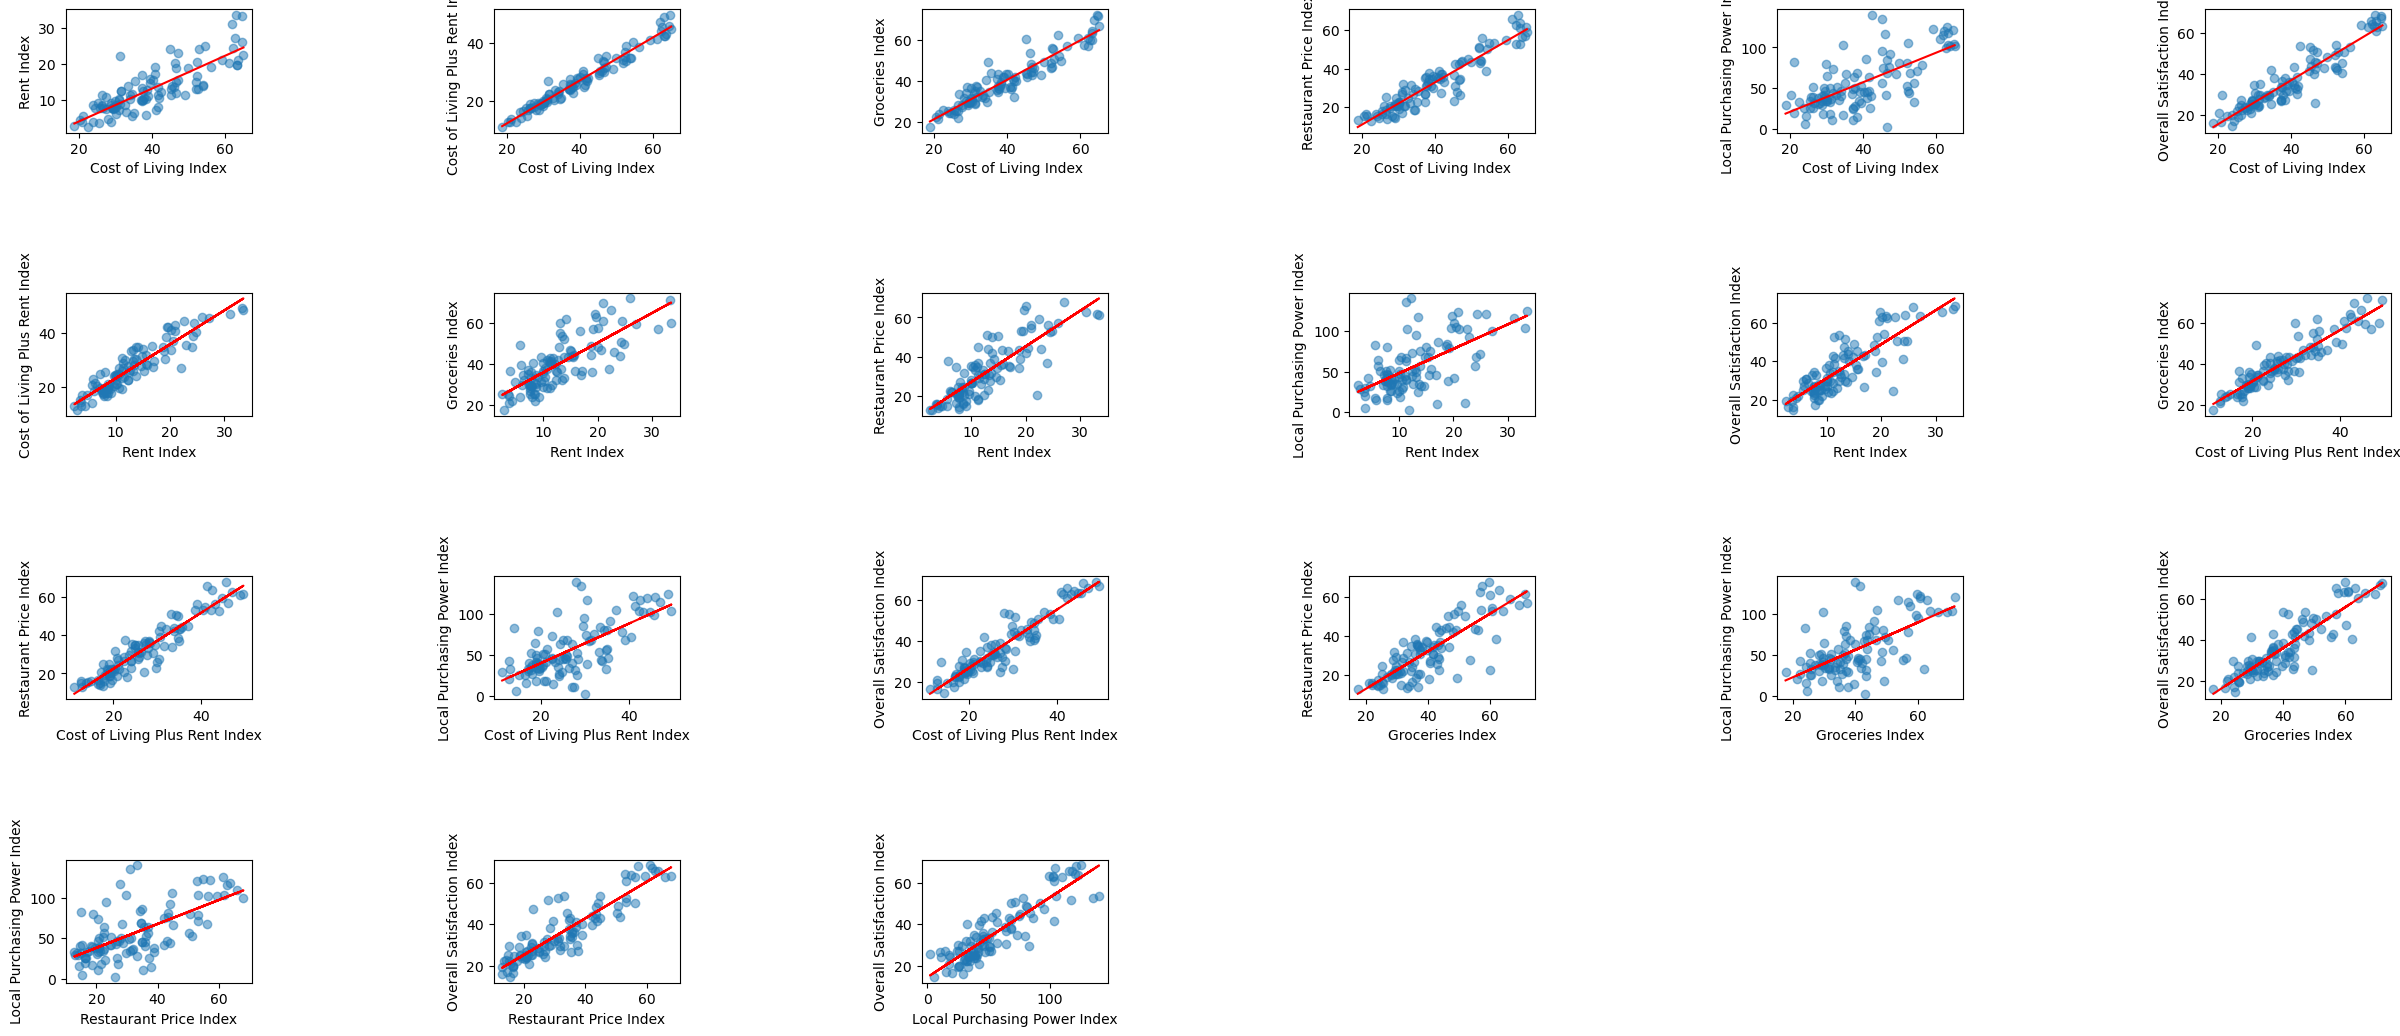

In [24]:
plt.figure(1, figsize=(30, 20))  # Увеличен размер для удобства
n = 0
variables = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
             'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index', 
             'Overall Satisfaction Index']
num_variables = len(variables)

for i in range(num_variables):
    for j in range(i + 1, num_variables):  
        n += 1
        plt.subplot(num_variables - 1, num_variables - 1, n)  
        x = variables[i]
        y = variables[j]
        plt.scatter(df[x], df[y], alpha=0.5)
        # plt.title(f'{x} vs {y}')  
        plt.xlabel(x)
        plt.ylabel(y)
        z = np.polyfit(df[x], df[y], 1)
        p = np.poly1d(z)
        plt.plot(df[x], p(df[x]), color='red')

plt.subplots_adjust(hspace= 1.3, wspace=1.3)  # Настройка расстояния между подграфиками
plt.show()

Были построены графики зависимости одних признаков от других используя plt.scatter() - функцию для построения диаграмм рассеяния
Все признаки имеют сильную зависимость друг от друга, так как такой характер анализируемых данных.
По данным графикам не получится выделить какие-то ярко выраженные группы, так как данные отражают зависимоти жизни в разных странах по разным паказателям.
В этот случае модно логически разделить на 3 кластера - высокая удовлетворенноесть, средняя и низкая.

### 4. Применение метода KMeans 

Построить график для того, чтобы понять оптимальное количество кластеров
Чтобы понять по графику оптимальное количество кластеров, можно использовать метод «локтя». 
Он заключается в построении графика зависимости суммы квадратов расстояний от точек до центроидов от числа кластеров.

На графике ищется точка «излома», где дальнейшее увеличение числа кластеров приводит к незначительному уменьшению суммы квадратов расстояний.
Оптимальным будет то количество кластеров, при котором ошибка перестаёт существенно уменьшаться, то есть начинает сглаживаться.

In [29]:
from sklearn.cluster import KMeans

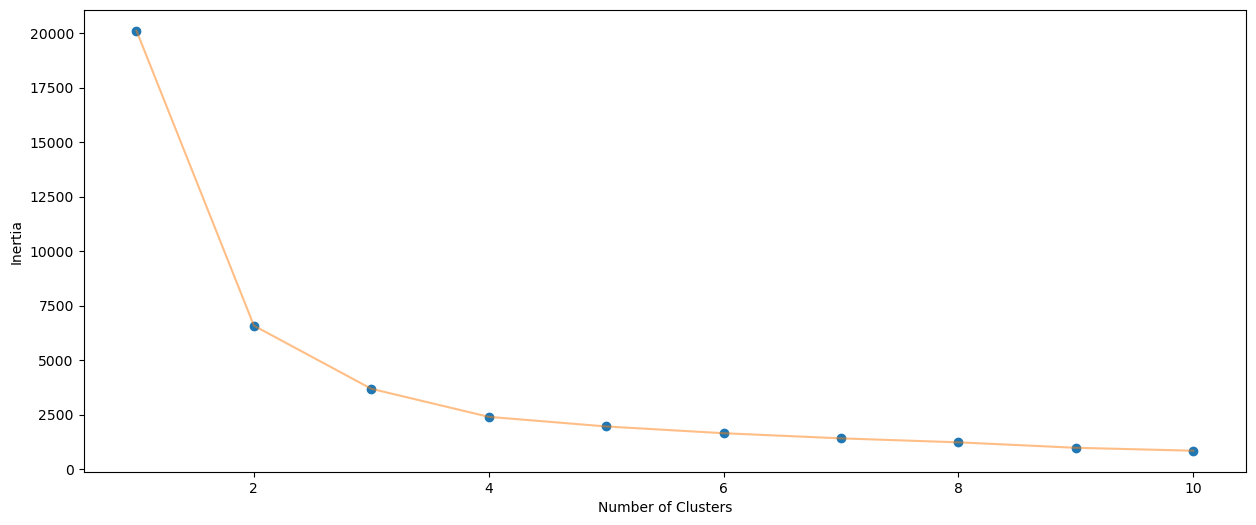

In [30]:
X1 = df[['Cost of Living Index', 'Rent Index']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [33]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
# n_clusters = 4 будет 4 кластера 
# метод - k-means++
# n_init=10: алгоритм будет запускаться 10 раз с различными начальными центрами, и будет выбран лучший результат по минимума внутрикластерного расстояния
# max_iter=300: максимальное количество итераций для одного запуска алгоритма.
# tol=0.0001: порог сходимости; если центры кластеров не изменяются больше чем на это значение, алгоритм остановится.
# random_state=111: фиксирует генерацию случайных последовательностей для получения воспроизводимых результатов.
# algorithm='elkan': выбирается алгоритм «Elkan», который более быстрый при работе с данными, если они имеют небольшие размеры и небольшую дисперсию в кластеризации.

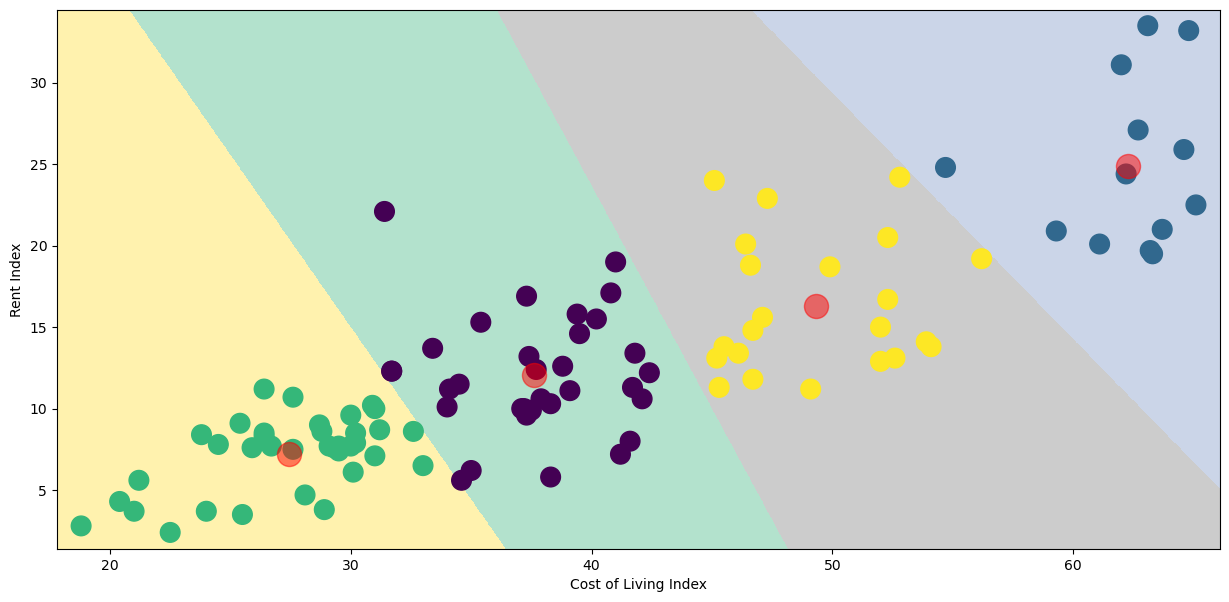

In [34]:
algorithm.fit(X1) 
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Cost of Living Index' ,y = 'Rent Index' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Rent Index') , plt.xlabel('Cost of Living Index')
plt.show()

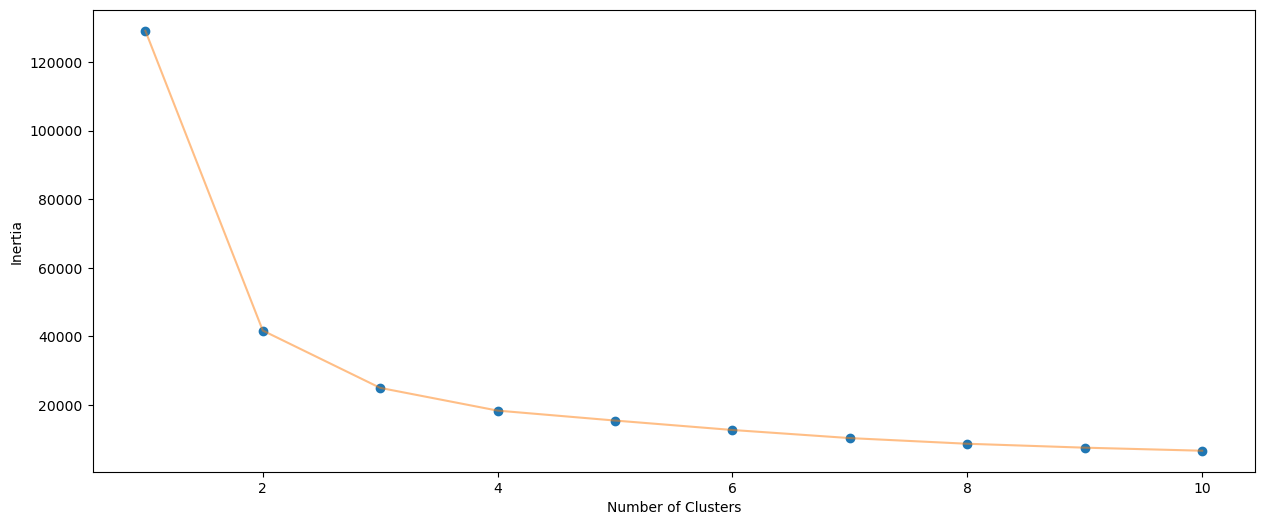

In [39]:
X1 = df[['Local Purchasing Power Index', 'Restaurant Price Index']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

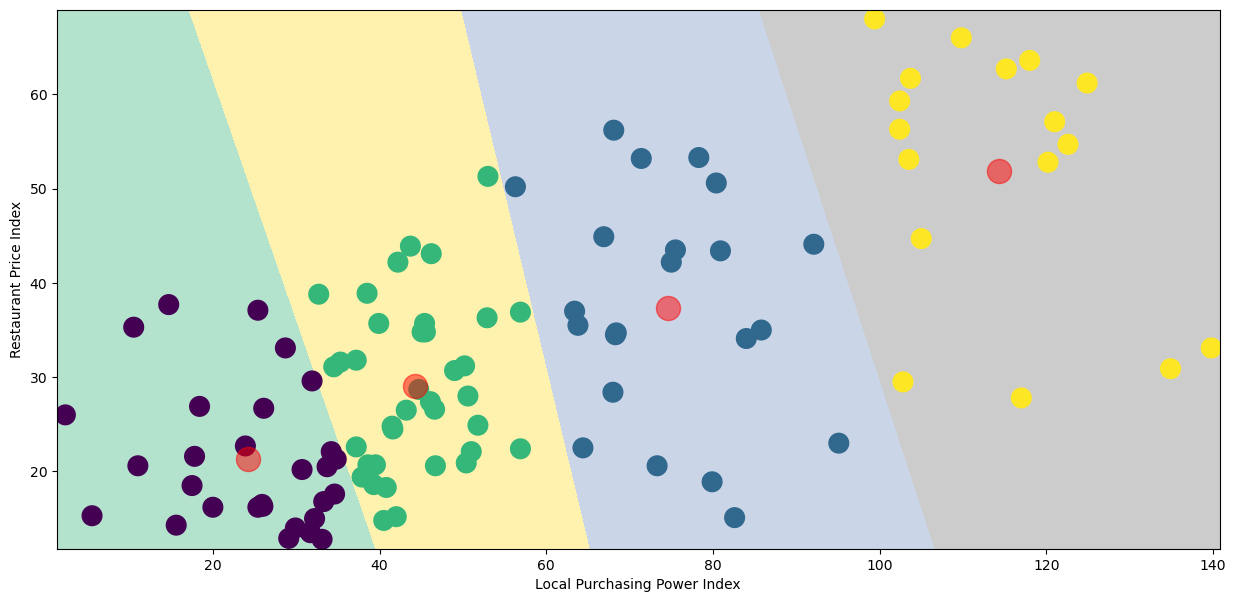

In [41]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1) # обучение модели
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Local Purchasing Power Index' ,y = 'Restaurant Price Index' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Restaurant Price Index') , plt.xlabel('Local Purchasing Power Index')
plt.show()

Алгоритм кластеризации был применен к двум парам пареметров, так как данные  близки друг к другу по смыслу, представляют из себя похожие друг на друга завсмимости, то нет смысла отображать их всех

### 5. Вывод

Данный data set удобен для работы со значениями, так как они с самого начала даны в удобном виде (численные значения, имеют одинаковый физическикй смысл - являются индексами). Такие данные нет необходимости нормализовать, или приводить в вид, удобный для построения графиков(напримери строкового в численный)
Но при применении к такому дата сету алгоритма класеризации будут полученны данные, но они они не будут представлять какой либо интерес для анализа и работы с данными